In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('led.csv')

# Data Preprocessing


## Handling missing values

In [7]:
# Removing Irrelevant Columns
df['percentageexpenditure'] = df['Totalexpenditure']
df = df.drop(['Population', 'AdultMortality', 'Totalexpenditure', 'thinness1-19years', 'thinness5-9years', 'under-fivedeaths', 'Year', 'HIV/AIDS', 'Measles', 'infantdeaths', 'BMI', 'Alcohol'], axis=1)

In [8]:
# handling missing values
# imputation of the mean for columns with very little data missing
lifeexpectancy_mean = df['Lifeexpectancy'].mean()
df['Lifeexpectancy'] = df["Lifeexpectancy"].fillna(lifeexpectancy_mean)

HepatitisB_mean = df['HepatitisB'].mean()
df['HepatitisB'] = df['HepatitisB'].fillna(HepatitisB_mean)

Diptheria_mean = df['Diphtheria'].mean()
df['Diphtheria'] = df["Diphtheria"].fillna(Diptheria_mean)

Polio_mean = df['Polio'].mean()
df['Polio'] = df["Polio"].fillna(Polio_mean)

Incomecompositionofresources_mean = df['Incomecompositionofresources'].mean()
df['Incomecompositionofresources'] = df["Incomecompositionofresources"].fillna(Incomecompositionofresources_mean)

Schooling_mean = df['Schooling'].mean()
df['Schooling'] = df["Schooling"].fillna(Schooling_mean)

percexp_mean = df['percentageexpenditure'].mean()
df['percentageexpenditure'] = df["percentageexpenditure"].fillna(percexp_mean)



In [9]:
df.dropna(subset=['GDP'], inplace=True)


## One-hot-encoding

In [10]:
# handling categorical data
status_encoded = pd.get_dummies(df['Status'])
df = pd.concat([df, status_encoded], axis=1)
df = df.drop(['Status'], axis=1)

In [11]:
# add continent classification
country_to_continent = pd.read_csv('Countries_by_continents.csv')
df.reset_index(drop=True, inplace=True)
df_copy = pd.merge(df, country_to_continent, on='Country', how='outer')
Continent = df_copy['Continent']
df.insert(1, 'Continent', Continent)
continent_encoded = pd.get_dummies(df['Continent'])
df = pd.concat([df, continent_encoded], axis=1)
df = df.drop(['Continent'], axis=1)
continents_data = df

## Handling Outliers

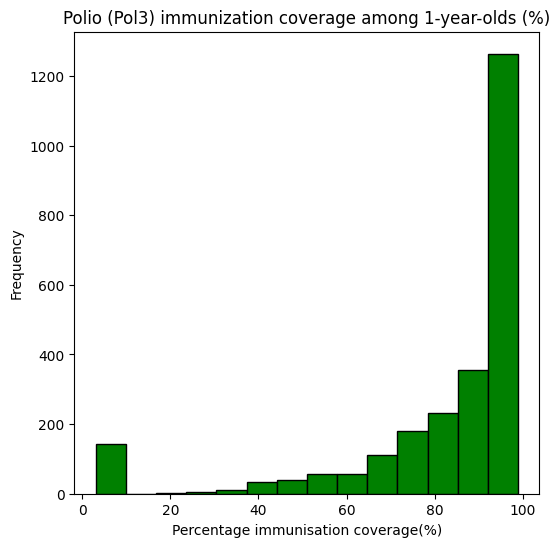

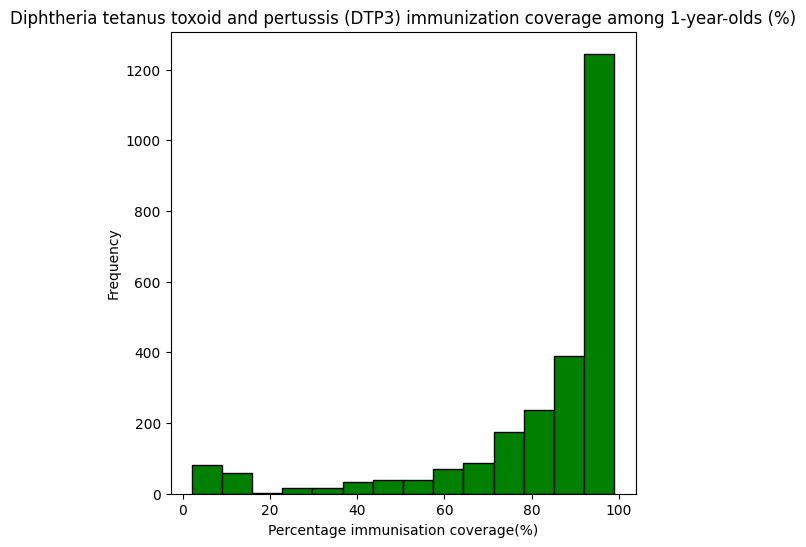

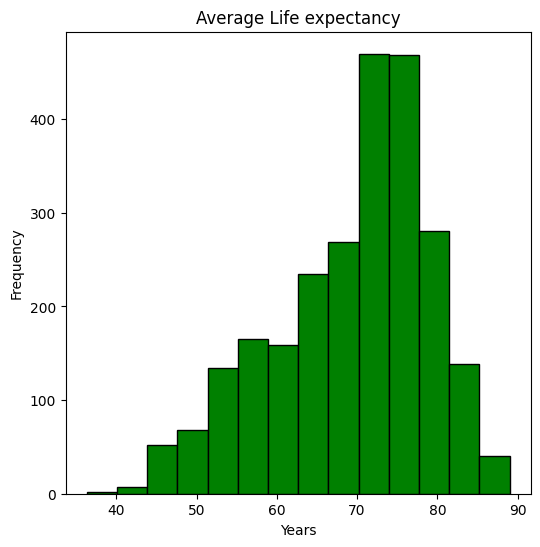

In [12]:
# Outliers Set 1
# Sample data

data = df['Polio']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
plt.hist(data, bins=bin_edges, color='green', edgecolor='black')
plt.title('Polio (Pol3) immunization coverage among 1-year-olds (%)')
plt.xlabel('Percentage immunisation coverage(%)')
plt.ylabel('Frequency')
plt.show()

data = df['Diphtheria']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
plt.hist(data, bins=bin_edges, color='green', edgecolor='black')
plt.title('Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)')
plt.xlabel('Percentage immunisation coverage(%)')
plt.ylabel('Frequency')
plt.show()


data = df['Lifeexpectancy']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
plt.hist(data, bins=bin_edges, color='green', edgecolor='black')
plt.title('Average Life expectancy')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()



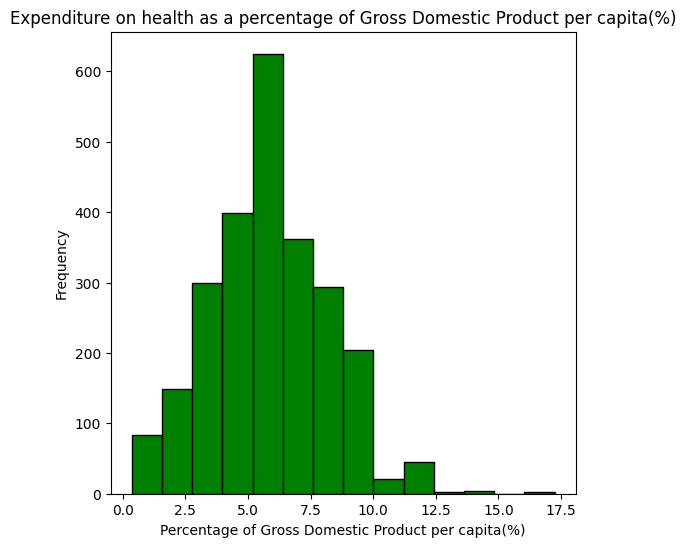

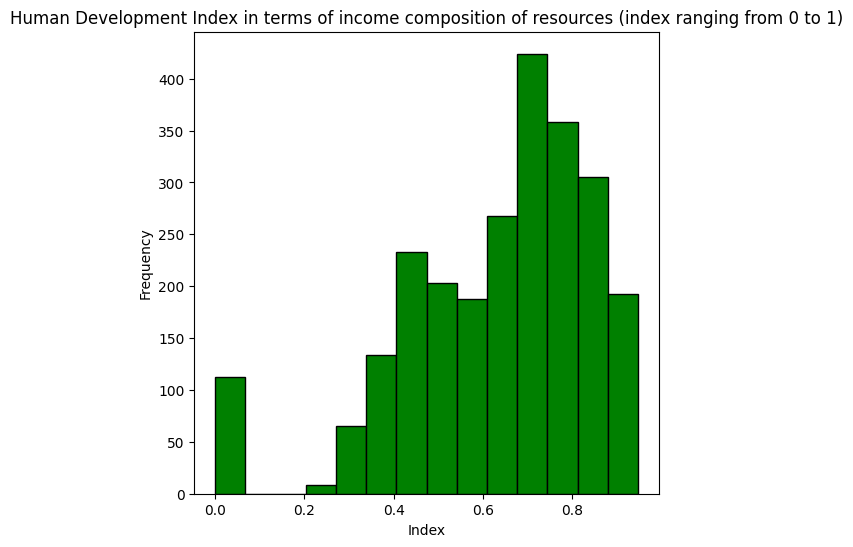

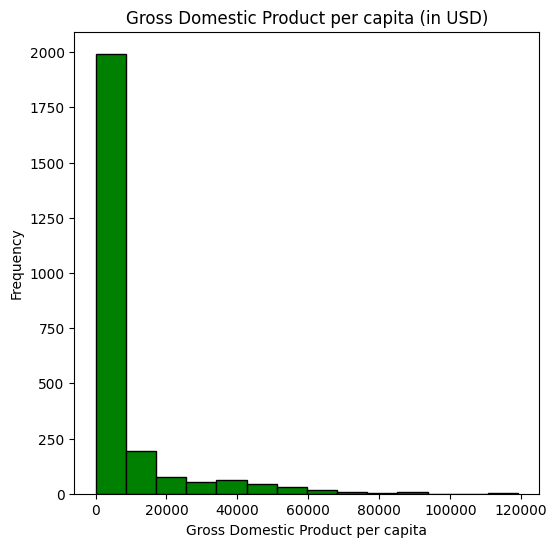

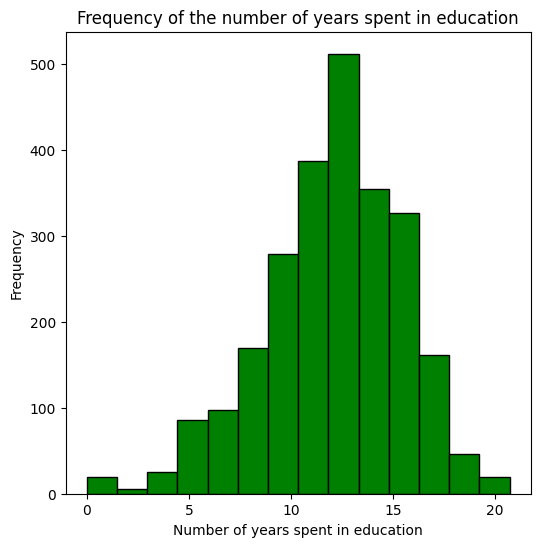

In [13]:
#Outlier set 2
data = df['percentageexpenditure']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
plt.hist(data, bins=bin_edges, color='green', edgecolor='black')
plt.title('Expenditure on health as a percentage of Gross Domestic Product per capita(%)')
plt.xlabel('Percentage of Gross Domestic Product per capita(%)')
plt.ylabel('Frequency')
plt.show()


data = df['Incomecompositionofresources']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
plt.hist(data, bins=bin_edges, color='green', edgecolor='black')
plt.title('Human Development Index in terms of income composition of resources (index ranging from 0 to 1)')
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.show()

data = df['GDP']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
plt.hist(data, bins=bin_edges, color='green', edgecolor='black')
plt.title('Gross Domestic Product per capita (in USD)')
plt.xlabel('Gross Domestic Product per capita')
plt.ylabel('Frequency')
plt.show()

data = df['Schooling']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
plt.hist(data, bins=bin_edges, color='green', edgecolor='black')
plt.title('Frequency of the number of years spent in education')
plt.xlabel('Number of years spent in education')
plt.ylabel('Frequency')
plt.show()

In [14]:
# fill in outlier set 2
mean_percentage_expenditure = df.loc[df['percentageexpenditure'] < 11, 'percentageexpenditure'].mean()
df.loc[df['percentageexpenditure'] > 11, 'percentageexpenditure'] = mean_percentage_expenditure

mean_percentage_expenditure = df.loc[df['percentageexpenditure'] > 3, 'percentageexpenditure'].mean()
df.loc[df['percentageexpenditure'] < 3, 'percentageexpenditure'] = mean_percentage_expenditure

mean_GDP = df.loc[df['GDP'] < 100000, 'GDP'].mean()
df.loc[df['GDP'] > 100000, 'GDP'] = mean_GDP

mean_schooling = df.loc[df['Schooling'] > 2.5, 'Schooling'].mean()
df.loc[df['Schooling'] < 2.5, 'Schooling'] = mean_schooling

mean_icr = df.loc[df['Incomecompositionofresources']> 0.2, 'Incomecompositionofresources'].mean()
df.loc[df['Incomecompositionofresources'] < 0.2, 'Incomecompositionofresources'] = mean_icr

mean_polio = df.loc[df['Polio']> 16, 'Polio'].mean()
df.loc[df['Polio'] < 16, 'Polio'] = mean_polio

mean_diphtheria = df.loc[df['Diphtheria']> 18, 'Diphtheria'].mean()
df.loc[df['Diphtheria'] < 18, 'Diphtheria'] = mean_diphtheria

df = df[df['Lifeexpectancy'] >= 50]




# Visualisation

## Bar Charts

(array([0, 1]), [Text(0, 0, 'Developed'), Text(1, 0, 'Developing')])

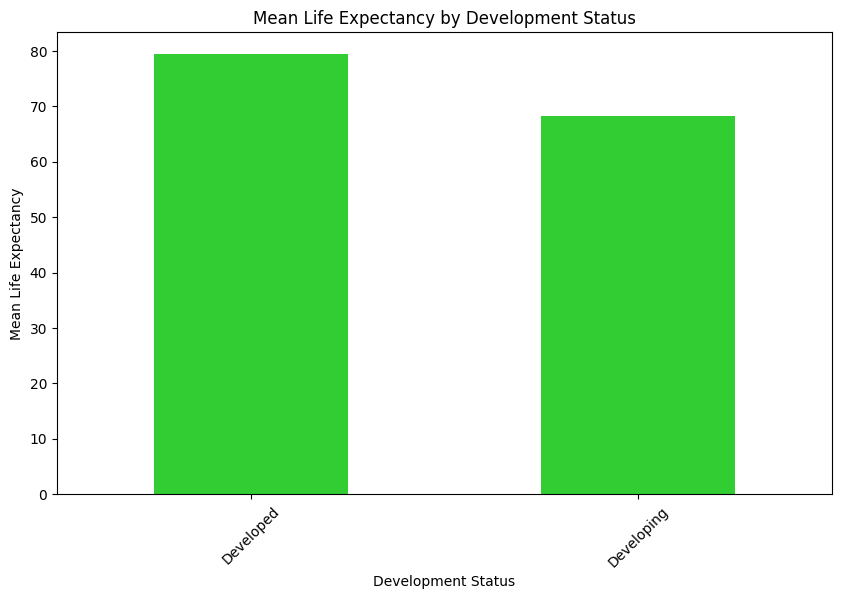

In [15]:
plt.figure(figsize=(10,6))
mean_developed_expectancy = df[df['Developed'] == 1]['Lifeexpectancy'].mean()
mean_developing_expectancy = df[df['Developing'] ==1]['Lifeexpectancy'].mean()
mean_expectancies = {'Developed': mean_developed_expectancy,
                     'Developing' : mean_developing_expectancy}
mean_expectancies = pd.Series(mean_expectancies)
mean_expectancies.plot(kind='bar', color='limegreen')
plt.title('Mean Life Expectancy by Development Status')
plt.xlabel('Development Status')
plt.ylabel('Mean Life Expectancy')
plt.xticks(rotation = 45)


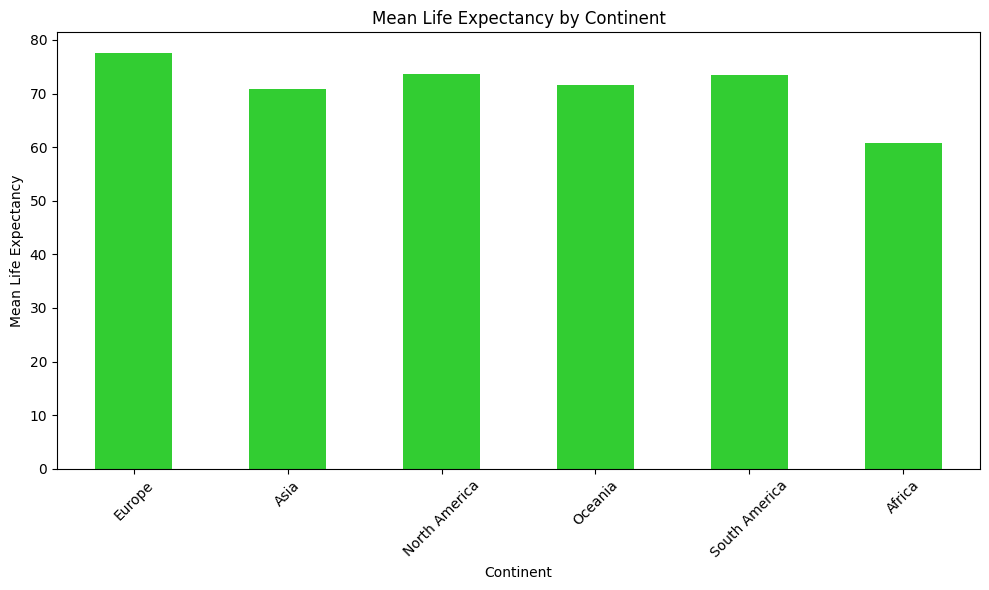

In [16]:
continent_means = {}

# Iterate over each continent
for continent in ['Europe', 'Asia', 'North America', 'Oceania', 'South America', 'Africa']:
    # Filter the DataFrame to select rows where the continent column equals 1
    continent_df = df[df[continent] == 1]

    # Calculate the mean life expectancy for the selected rows
    mean_life_expectancy = continent_df['Lifeexpectancy'].mean()

    # Store the mean life expectancy in the dictionary
    continent_means[continent] = mean_life_expectancy

continent_means_series = pd.Series(continent_means)

# Plot the bar chart
plt.figure(figsize=(10, 6))
continent_means_series.plot(kind='bar', color='limegreen')
plt.title('Mean Life Expectancy by Continent')
plt.xlabel('Continent')
plt.ylabel('Mean Life Expectancy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Scatter Plots

In [17]:
df.isnull().sum()

Country                         0
Lifeexpectancy                  0
percentageexpenditure           0
HepatitisB                      0
Polio                           0
Diphtheria                      0
GDP                             0
Incomecompositionofresources    0
Schooling                       0
Developed                       0
Developing                      0
Africa                          0
Asia                            0
Europe                          0
North America                   0
Oceania                         0
South America                   0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

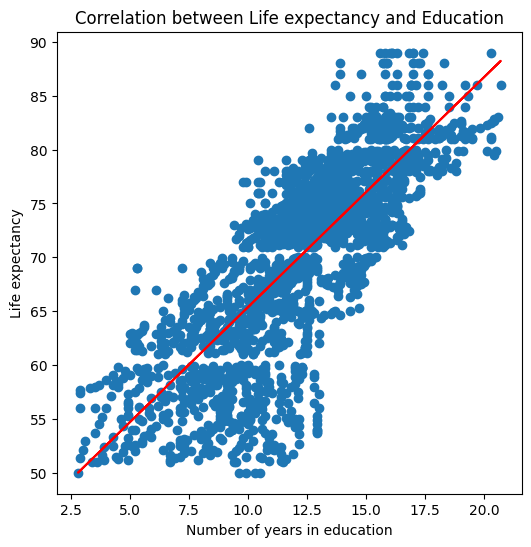

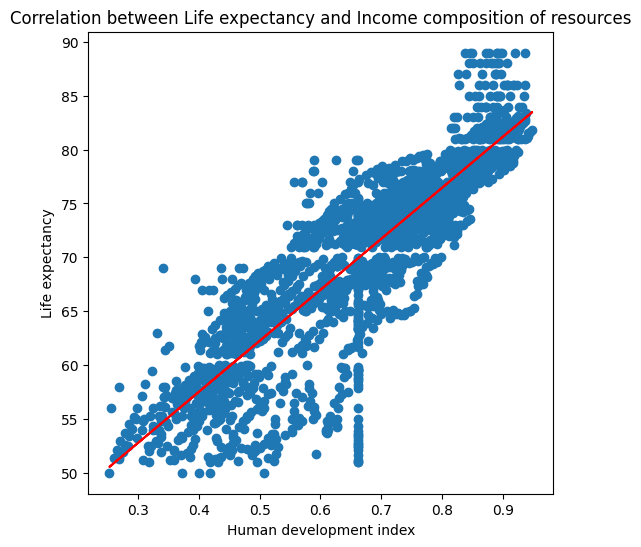

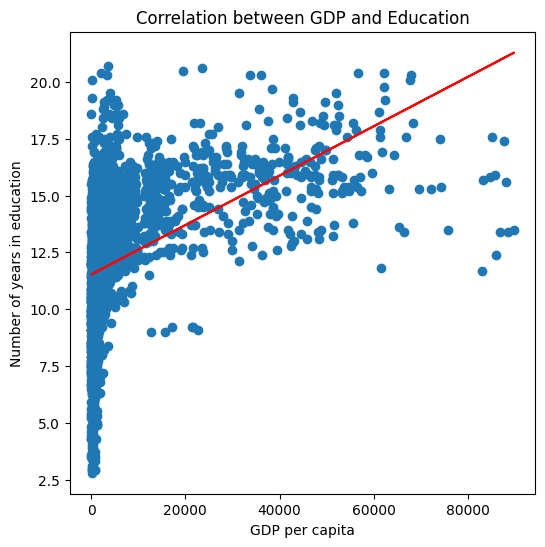

In [18]:

x = df['Schooling']
y = df['Lifeexpectancy']

plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
x_values = np.array(x)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')
plt.xlabel('Number of years in education')
plt.ylabel('Life expectancy')
plt.title('Correlation between Life expectancy and Education')
plt.scatter(x, y)
plt.show

x = df['Incomecompositionofresources']
y = df['Lifeexpectancy']

plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
x_values = np.array(x)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')
plt.xlabel('Human development index')
plt.ylabel('Life expectancy')
plt.title('Correlation between Life expectancy and Income composition of resources')
plt.scatter(x, y)
plt.show

y= df['Schooling']
x = df['GDP']

plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
x_values = np.array(x)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')
plt.ylabel('Number of years in education')
plt.xlabel('GDP per capita')
plt.title('Correlation between GDP and Education')
plt.scatter(x, y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

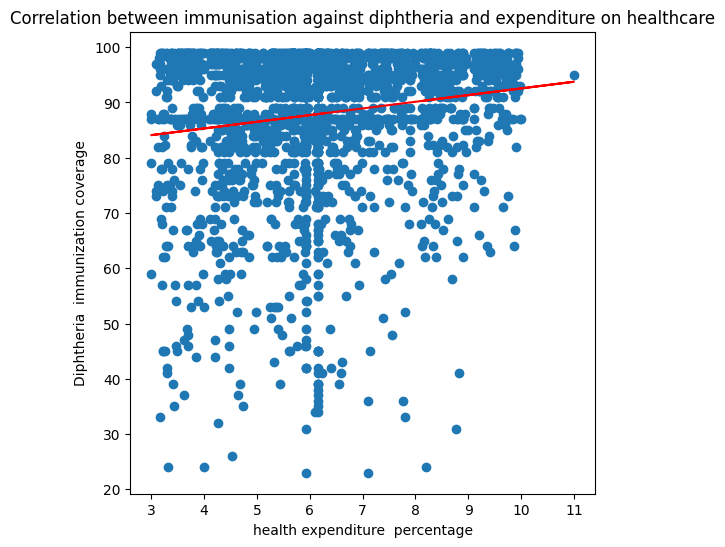

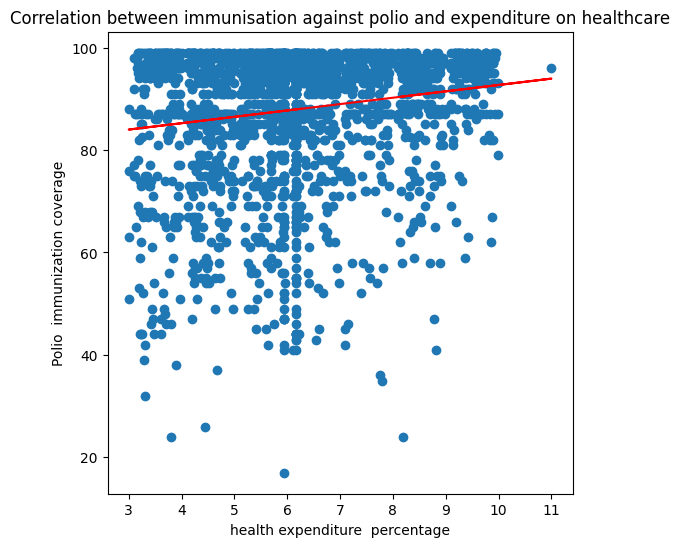

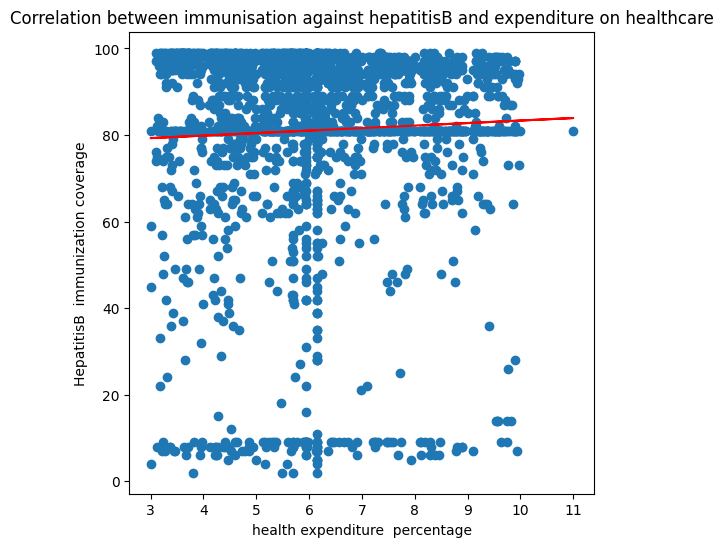

In [19]:

y = df['Diphtheria']
x = df['percentageexpenditure']
plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
x_values = np.array(x)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')
plt.ylabel('Diphtheria  immunization coverage')
plt.xlabel('health expenditure  percentage')
plt.title('Correlation between immunisation against diphtheria and expenditure on healthcare')
plt.scatter(x, y)
plt.show

y = df['Polio']
x = df['percentageexpenditure']
plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
x_values = np.array(x)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')
plt.ylabel('Polio  immunization coverage')
plt.xlabel('health expenditure  percentage')
plt.title('Correlation between immunisation against polio and expenditure on healthcare')
plt.scatter(x, y)
plt.show

y = df['HepatitisB']
x = df['percentageexpenditure']
plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
x_values = np.array(x)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')
plt.ylabel('HepatitisB  immunization coverage')
plt.xlabel('health expenditure  percentage')
plt.title('Correlation between immunisation against hepatitisB and expenditure on healthcare')
plt.scatter(x, y)
plt.show

## Correlation Matrix

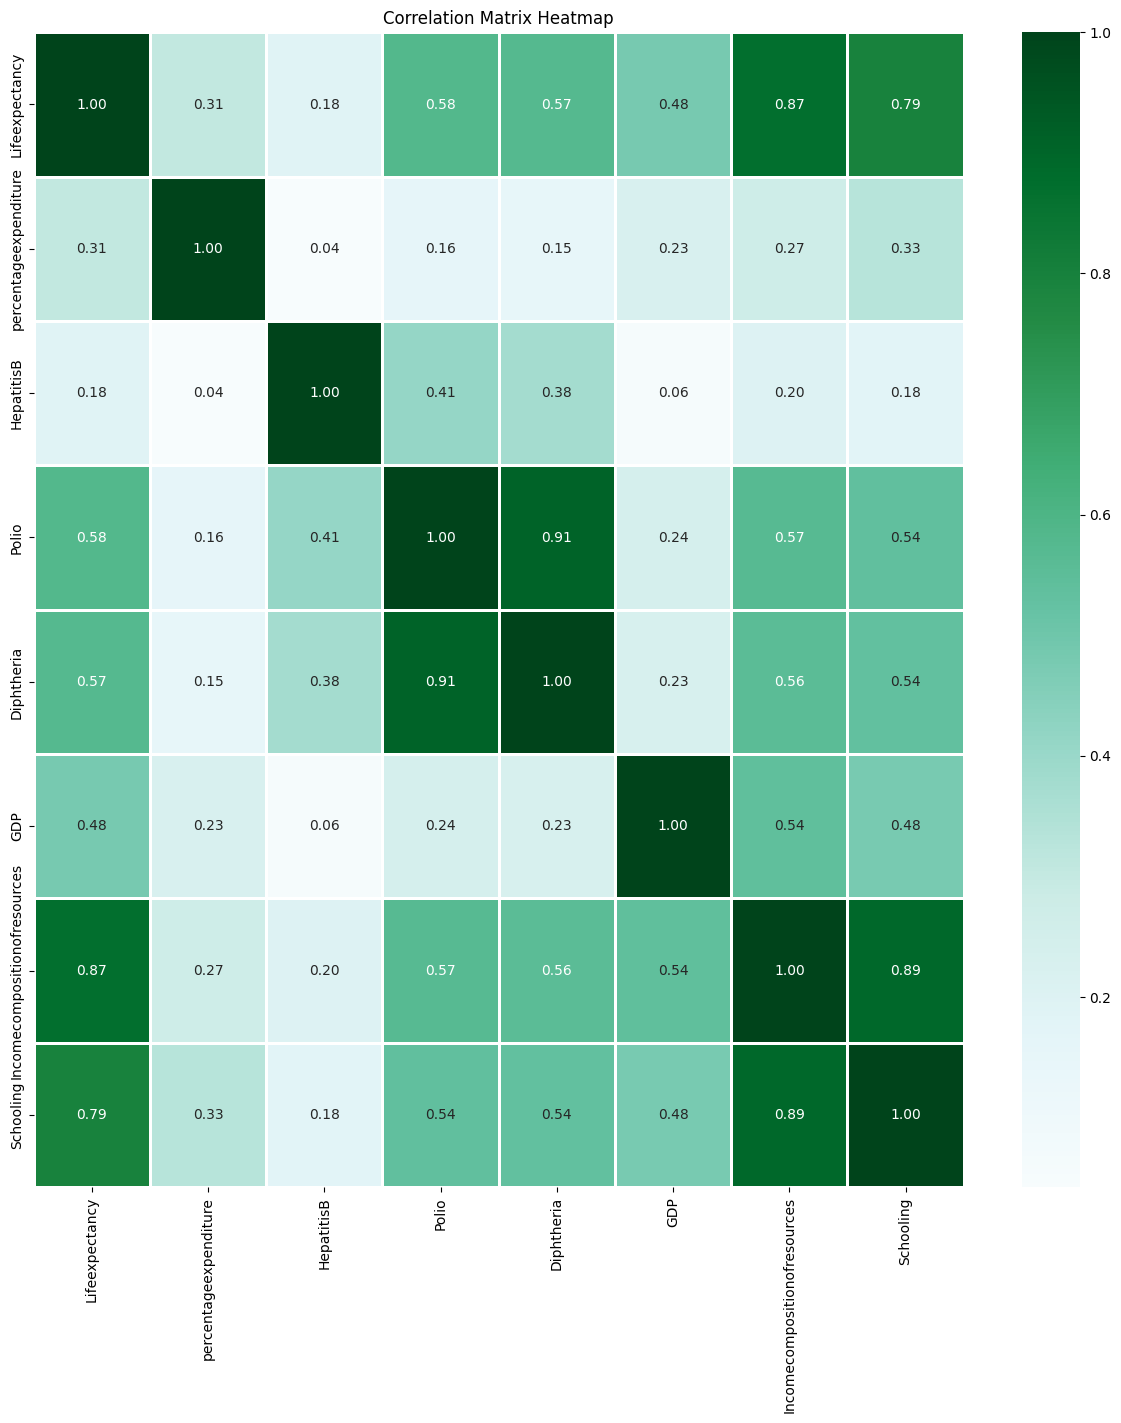

In [20]:
# Compute the correlation matrix
correlation_features = df[['Lifeexpectancy',  'percentageexpenditure', 'HepatitisB', 'Polio', 'Diphtheria','GDP', 'Incomecompositionofresources', 'Schooling']]
correlation_matrix = correlation_features.corr()

# Generate a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='BuGn', fmt=".2f", linewidths=0.9)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Data Standardisation

In [21]:
# Standardising data
##df['Lifeexpectancy'] = ( df['Lifeexpectancy'] - df['Lifeexpectancy'].mean() ) / df['Lifeexpectancy'].std()

#df['Alcohol'] = ( df['Alcohol'] - df['Alcohol'].mean() ) / df['Alcohol'].std()

#df['BMI'] = ( df['BMI']  - df['BMI'] .mean() ) / df['BMI'] .std()

##df['Schooling'] = ( df['Schooling'] - df['Schooling'].mean() ) / df['Schooling'] .std()

##df['Incomecompositionofresources'] = ( df['Incomecompositionofresources'] - df['Incomecompositionofresources'].mean() ) / df['Incomecompositionofresources'].std()

##df['Polio'] = ( df['Polio'] - df['Polio'].mean() ) / df['Polio'].std()

##df['Diphtheria'] = ( df['Diphtheria'] - df['Diphtheria'].mean() ) / df['Diphtheria'].std()

##df['percentageexpenditure'] = ( df['percentageexpenditure'] - df['percentageexpenditure'].mean() ) / df['percentageexpenditure'].std()

##df['HepatitisB'] = ( df['HepatitisB'] - df['HepatitisB'].mean() ) / df['HepatitisB'].std()

##df['GDP'] = ( df['GDP'] - df['GDP'].mean() ) / df['GDP'].std()


# Visualisation Continued

## Histograms

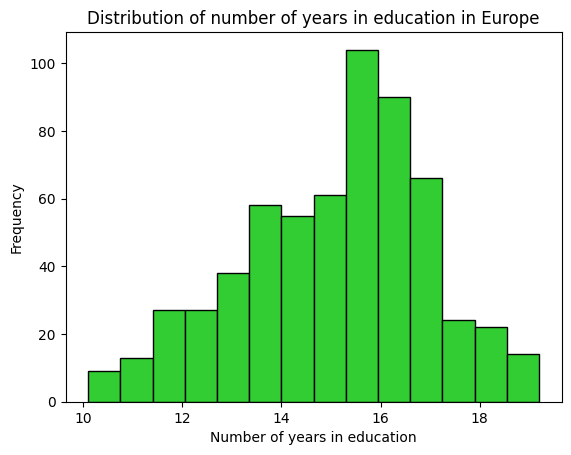

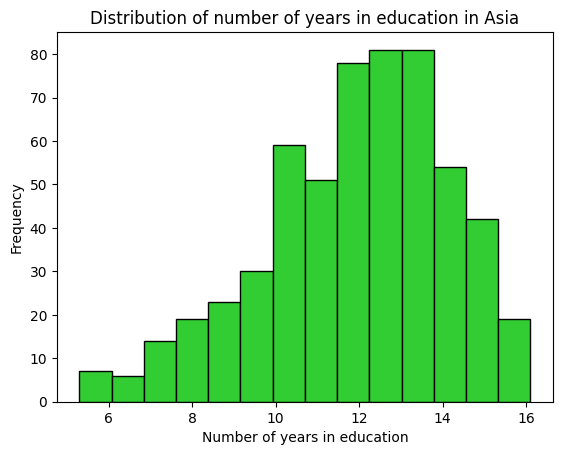

In [22]:
data = df[df['Europe'] == 1]['Schooling']
bin_edges = np.linspace(min(data), max(data), 15)
plt.hist(data, bins=bin_edges, color='limegreen', edgecolor='black')
plt.xlabel('Number of years in education')
plt.ylabel('Frequency')
plt.title('Distribution of number of years in education in Europe')
plt.show()

data = df[df['Asia'] == 1]['Schooling']
bin_edges = np.linspace(min(data), max(data), 15)
plt.hist(data, bins=bin_edges, color='limegreen', edgecolor='black')
plt.xlabel('Number of years in education')
plt.ylabel('Frequency')
plt.title('Distribution of number of years in education in Asia')
plt.show()


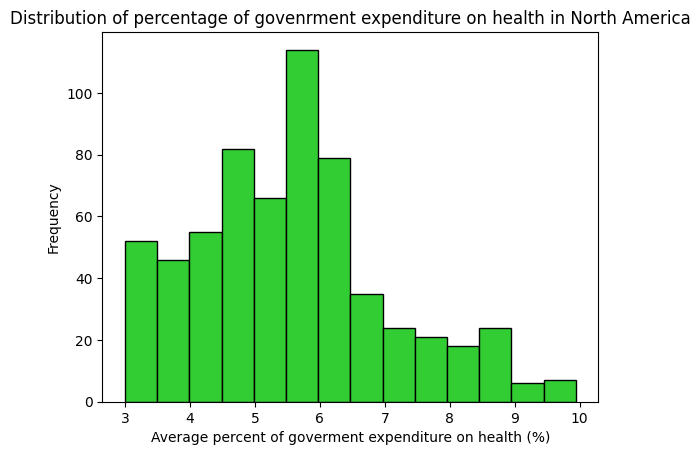

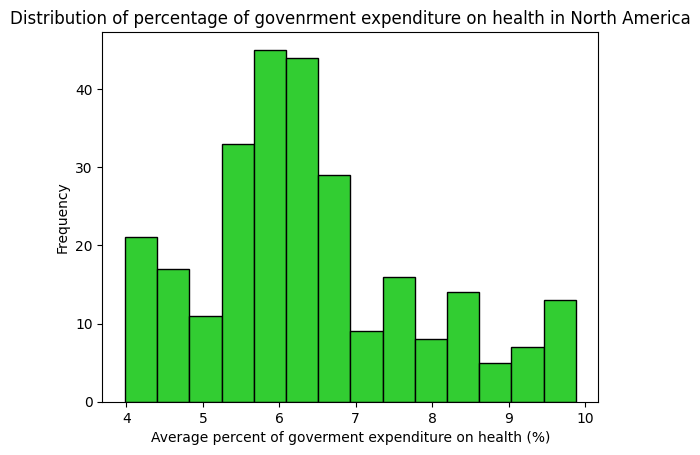

In [23]:
data = df[df['Africa'] == 1]['percentageexpenditure']
bin_edges = np.linspace(min(data), max(data), 15)
plt.hist(data, bins=bin_edges, color='limegreen', edgecolor='black')
plt.xlabel('Average percent of goverment expenditure on health (%)')
plt.ylabel('Frequency')
plt.title('Distribution of percentage of govenrment expenditure on health in North America')
plt.show()


data = df[df['North America'] == 1]['percentageexpenditure']
bin_edges = np.linspace(min(data), max(data), 15)
plt.hist(data, bins=bin_edges, color='limegreen', edgecolor='black')
plt.xlabel('Average percent of goverment expenditure on health (%)')
plt.ylabel('Frequency')
plt.title('Distribution of percentage of govenrment expenditure on health in North America')
plt.show()



# Dimensionality Reduction


In [24]:
from sklearn.decomposition import PCA

vaccinations = df[["HepatitisB", "Polio", "Diphtheria"]]
pca = PCA(n_components=1)
Vaccinations_reduced = pca.fit_transform(vaccinations)
Vaccinations_reduced
#vaccinations



array([[ 22.37519399],
       [ 36.65467365],
       [ 32.75857736],
       ...,
       [-14.73769997],
       [ 61.17396486],
       [ 19.24160311]])

# Data Splitting

In [25]:
from sklearn.model_selection import train_test_split
Continents = df[["Europe", "North America", "Oceania", "South America", "Africa", "Asia"]]
Development_status = df[['Developing', 'Developed']]

GDP_train, GDP_test = train_test_split(df["GDP"], test_size=0.2, random_state=42)
Schooling_train, Schooling_test = train_test_split(df["Schooling"], test_size=0.2, random_state=42)
IncomeCompositionOfResources_train, IncomeCompositionOfResources_test = train_test_split(df["Incomecompositionofresources"], test_size=0.2, random_state=42)
PercentageExpenditure_train, PercentageExpenditure_test = train_test_split(df["percentageexpenditure"], test_size=0.2, random_state=42)
LifeExpectancy_train, LifeExpectancy_test = train_test_split(df["Lifeexpectancy"], test_size = 0.2, random_state=42)
Vaccinations_train, Vaccinations_test = train_test_split(Vaccinations_reduced, test_size=0.2, random_state=42)
Continents_train, Continents_test = train_test_split(Continents, test_size = 0.2, random_state=42)

HepatitisB_train, HepatitisB_test = train_test_split(df["HepatitisB"], test_size = 0.2, random_state=42)
Polio_train, Polio_test = train_test_split(df["Polio"], test_size = 0.2, random_state=42)
Diphtheria_train, Diphtheria_test = train_test_split(df["Diphtheria"], test_size = 0.2, random_state=42)

Continents_train, Continents_test = train_test_split(Continents, test_size=0.2, random_state=42)
Development_status_train, Development_status_test = train_test_split(Development_status, test_size=0.2, random_state=42)

len(Continents), len(Development_status)


(2380, 2380)

# Model Implementation

# New Section

In [26]:
#LINEAR REGRESSION
#DO VACCINATIONS AFFECT LIFE EXPECTANCY
#Training vaccines model
import numpy as np
from sklearn.linear_model import LinearRegression

X = Vaccinations_train.reshape(-1, 1)
model = LinearRegression()
model.fit(X, LifeExpectancy_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.12761422]
Intercept: 70.35273097189918


In [27]:
#testing vaccines model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X_test = Vaccinations_test.reshape(-1, 1)
y_pred = model.predict(X_test)
mse = mean_squared_error(LifeExpectancy_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(LifeExpectancy_test, y_pred)
print("r2: ", r2)


#X_new = np.array(-20).reshape(-1, 1)
#model.predict(X_new)

Mean Squared Error (MSE): 68.27742579270272
r2:  0.12573652835521143


<ipython-input-28-4e13b7bf7de6>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')


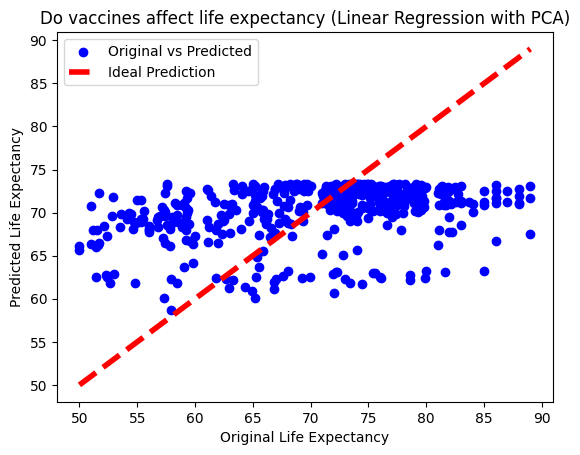

In [28]:
# Plot original vs predicted data
import matplotlib.pyplot as plt

plt.scatter(LifeExpectancy_test, y_pred, color='blue', label='Original vs Predicted')
plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')
plt.xlabel('Original Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Do vaccines affect life expectancy (Linear Regression with PCA)')
plt.legend()
plt.show()


In [29]:
#training vaccines model without dimensionality reduction (PCA)
from sklearn.linear_model import LinearRegression
import numpy as np

X_train = np.column_stack((HepatitisB_train, Polio_train, Diphtheria_train))
model = LinearRegression()
model.fit(X_train, LifeExpectancy_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.03134371  0.24668014  0.16304457]
Intercept: 36.92881830250763


In [30]:
import numpy as np

new_HepatitisB = 65
new_Polio = 50
new_Diphtheria = 65
X_new = np.array([[new_HepatitisB, new_Polio, new_Diphtheria]])
prediction = model.predict(X_new)

print("Life Expectancy Prediction:", prediction[0])

Life Expectancy Prediction: 57.82338139008802


In [31]:
#testing vaccines model without dimensionality reduction (PCA)
from sklearn.metrics import mean_squared_error

X_test = np.column_stack((HepatitisB_test, Polio_test, Diphtheria_test))
y_pred= model.predict(X_test)
mse = mean_squared_error(LifeExpectancy_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 53.64956933117985


<ipython-input-32-97733af23eb7>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')


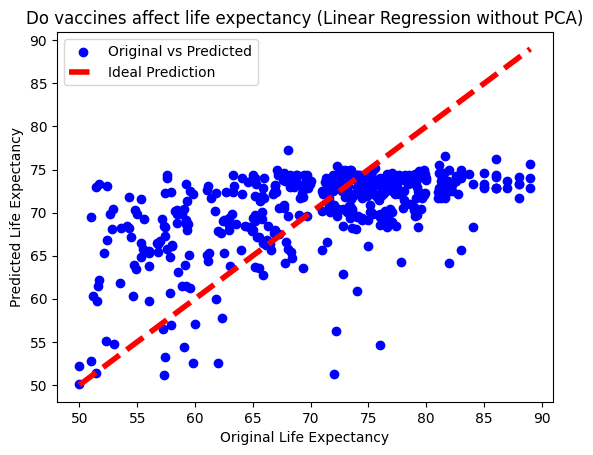

In [32]:
import matplotlib.pyplot as plt

X_test = np.column_stack((HepatitisB_test, Polio_test, Diphtheria_test))
plt.scatter(LifeExpectancy_test, model.predict(X_test), color='blue', label='Original vs Predicted')
plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')
plt.xlabel('Original Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Do vaccines affect life expectancy (Linear Regression without PCA)')
plt.legend()
plt.show()



In [33]:
#Polynomial Regression
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train = np.column_stack((HepatitisB_train, Polio_train, Diphtheria_train))
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly, LifeExpectancy_train)



LinearRegression()

In [34]:
#Testing polynomial regression model
import numpy as np
from sklearn.metrics import mean_squared_error

X_test = np.column_stack((HepatitisB_test, Polio_test, Diphtheria_test))
X_poly_test = poly.transform(X_test)
y_test_pred = model.predict(X_poly_test)
test_error = mean_squared_error(LifeExpectancy_test, y_test_pred)
print("Mean Squared Error:", test_error)


Mean Squared Error: 47.56397236811125


<ipython-input-35-94d716f8cdfe>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')


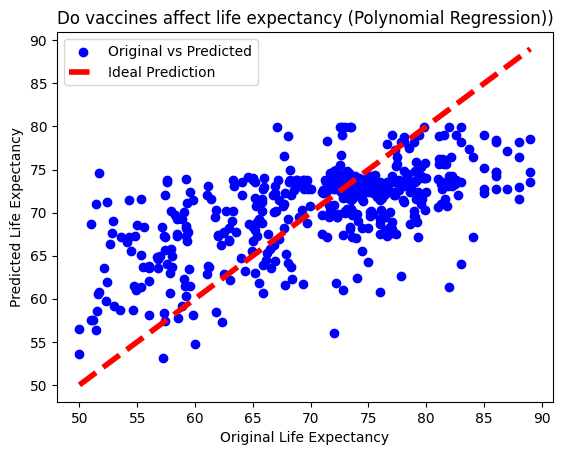

In [35]:
import matplotlib.pyplot as plt

plt.scatter(LifeExpectancy_test, y_test_pred, color='blue', label='Original vs Predicted')
plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')
plt.xlabel('Original Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Do vaccines affect life expectancy (Polynomial Regression))')
plt.legend()
plt.show()


In [36]:
X_test = np.column_stack((HepatitisB_test, Polio_test, Diphtheria_test))
X_poly_test = poly.transform(X_test)
y_test_pred = model.predict(X_poly_test)
y_test_pred

array([73.3495821 , 57.26323411, 62.07127362, 65.53394839, 79.91840399,
       73.74858561, 66.67320362, 72.62997554, 73.05632636, 74.83441304,
       63.25903558, 73.74858561, 58.59652988, 53.1087387 , 73.07480179,
       72.62997554, 76.60362071, 76.4590514 , 74.76576489, 63.57620798,
       74.14019262, 73.57597331, 71.26353659, 71.5409304 , 70.81421235,
       73.74858561, 68.20260317, 74.00601265, 68.64708558, 68.16727613,
       62.377473  , 73.31595125, 76.18994162, 59.19902393, 68.13813833,
       74.28864207, 73.74858561, 72.39618149, 79.91840399, 69.46947749,
       79.91840399, 72.75682497, 71.65004804, 66.69592595, 71.94015075,
       70.88954991, 67.23460819, 73.8339813 , 60.73107278, 72.54036919,
       71.3132871 , 76.4590514 , 73.57597331, 77.30446019, 71.22029544,
       72.2526768 , 72.01106597, 67.74319414, 69.21596251, 74.54280361,
       73.3495821 , 72.42079675, 76.18994162, 72.75682497, 78.75643036,
       73.911224  , 74.76576489, 72.17548157, 73.83981991, 73.74

In [37]:
#DOES SOCIAL CLASS AFFECT LIFE EXPECTANCY
#training main question with linear regression
from sklearn.linear_model import LinearRegression
import numpy as np

X_train = np.column_stack((GDP_train, Schooling_train, IncomeCompositionOfResources_train, PercentageExpenditure_train))
model = LinearRegression()
model.fit(X_train, LifeExpectancy_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [3.79802018e-06 1.59611349e-01 4.27672875e+01 3.42385027e-01]
Intercept: 37.55144471605099


In [38]:
#testing main questions with linear regression
from sklearn.metrics import mean_squared_error

X_test = np.column_stack((GDP_test, Schooling_test, IncomeCompositionOfResources_test, PercentageExpenditure_test))
y_pred= model.predict(X_test)
mse = mean_squared_error(LifeExpectancy_test, y_pred)
print("Mean squared error:", mse)


Mean squared error: 18.82491611834729


<ipython-input-39-08ab30d235f1>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')


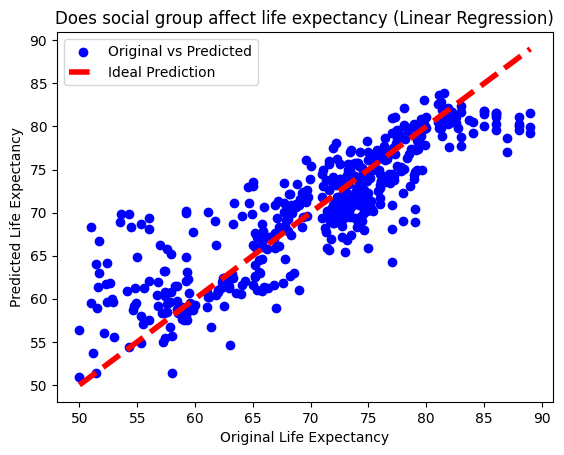

In [39]:
import matplotlib.pyplot as plt

plt.scatter(LifeExpectancy_test, y_pred, color='blue', label='Original vs Predicted')
plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')
plt.xlabel('Original Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Does social group affect life expectancy (Linear Regression)')
plt.legend()
plt.show()


In [40]:
#making predictions with main model
new_GDP = 100000
new_Schooling = 10
new_IncomeCompositionOfResources = 0.8
new_PercentageExpenditure = 5
X_new = np.array([[new_GDP, new_Schooling, new_IncomeCompositionOfResources, new_PercentageExpenditure]])
predicted_life_expectancy = model.predict(X_new)
print("Predicted Life Expectancy:", predicted_life_expectancy)

Predicted Life Expectancy: [75.45311535]


In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

X_train = np.column_stack((GDP_train, Schooling_train, IncomeCompositionOfResources_train, PercentageExpenditure_train))
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly_train, LifeExpectancy_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 0.00000000e+00 -6.94412541e-04 -1.94946709e+00  8.29125212e+01
  7.80495451e-01 -1.02856902e-09 -2.03203931e-05  1.23290396e-03
 -4.15936623e-07 -2.79282921e-01  1.27050688e+01  3.69578175e-02
 -1.43164173e+02 -3.33706153e-01 -5.04086532e-02]
Intercept: 37.14429634494683


In [42]:
from sklearn.metrics import mean_squared_error

X_test = np.column_stack((GDP_test, Schooling_test, IncomeCompositionOfResources_test, PercentageExpenditure_test))
X_poly_test = poly.transform(X_test)
y_pred_test = model.predict(X_poly_test)
mse_test = mean_squared_error(LifeExpectancy_test, y_pred_test)
print("Mean squared error:", mse_test)


Mean squared error: 16.592000137769173


<ipython-input-43-f005e8473b73>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')


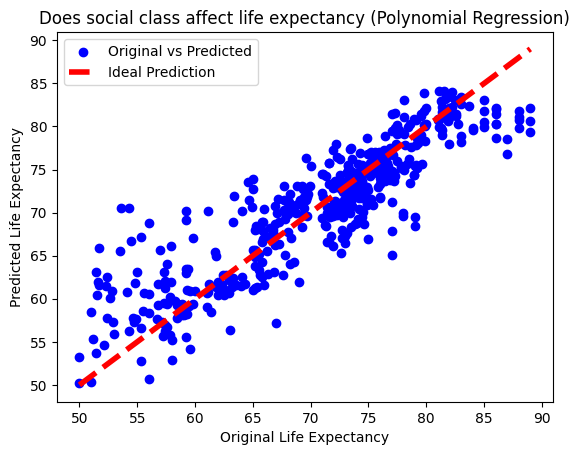

In [43]:
import matplotlib.pyplot as plt

plt.scatter(LifeExpectancy_test, y_pred_test, color='blue', label='Original vs Predicted')
plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')
plt.xlabel('Original Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Does social class affect life expectancy (Polynomial Regression)')
plt.legend()
plt.show()


### **Lasso Regression**

In [44]:
# Tiernan Do educated people earn more money?
from sklearn.linear_model import Lasso

# train lasso regression model
lasso_model = Lasso(alpha=0.1)  # Using Lasso with alpha=0.1
X_train = np.column_stack((Schooling_train, IncomeCompositionOfResources_train))
lasso_model.fit(X_train, LifeExpectancy_train)


Lasso(alpha=0.1)

In [45]:
# make predictions on testing data
X_test = np.column_stack((Schooling_test, IncomeCompositionOfResources_test))
y_pred_lasso = lasso_model.predict(X_test)

Predicted Life Expectancy (Lasso): [70.72629866]


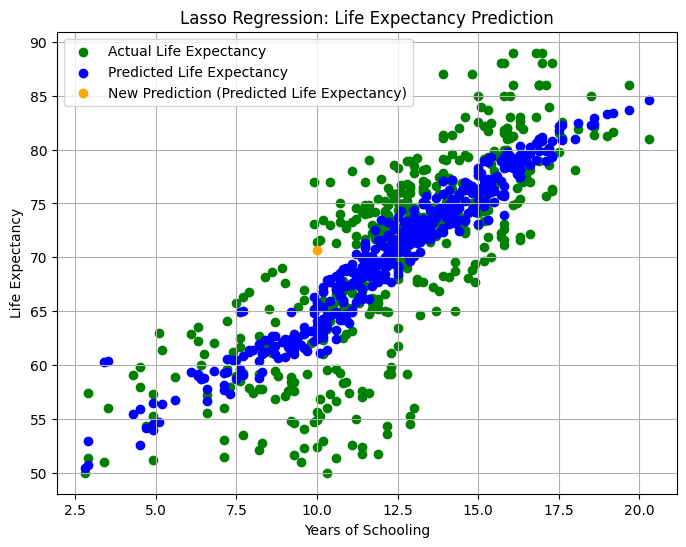

In [46]:
# make prediction for the new data point
new_Schooling = 10
new_IncomeCompositionOfResources = 0.8
X_new = np.array([[new_Schooling, new_IncomeCompositionOfResources]])
predicted_life_expectancy_lasso = lasso_model.predict(X_new)
print("Predicted Life Expectancy (Lasso):", predicted_life_expectancy_lasso)

# plotting testing results including the new prediction
plt.figure(figsize=(8, 6))
plt.scatter(Schooling_test, LifeExpectancy_test, color='green', label='Actual Life Expectancy')
plt.scatter(Schooling_test, y_pred_lasso, color='blue', label='Predicted Life Expectancy')
plt.scatter(new_Schooling, predicted_life_expectancy_lasso, color='orange', label='New Prediction (Predicted Life Expectancy)')
plt.xlabel('Years of Schooling')
plt.ylabel('Life Expectancy')
plt.title('Lasso Regression: Life Expectancy Prediction')
plt.legend()
plt.grid(True)
plt.show()

Coefficients: [ 1.10288246 22.65385887]
Intercept: 41.57438692113696


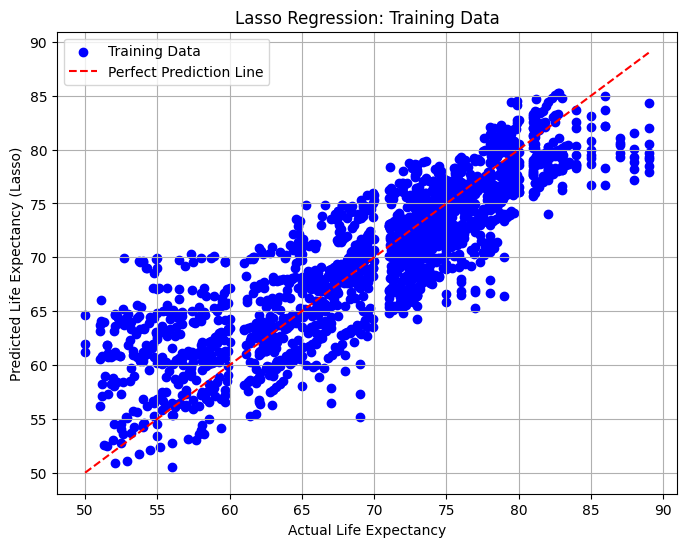

In [47]:
# MAIN QUESTION: How does social group affect life expectancy?

# training Lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, LifeExpectancy_train)
print("Coefficients:", lasso_model.coef_)
print("Intercept:", lasso_model.intercept_)

# plotting training data with Lasso regression
plt.figure(figsize=(8, 6))
plt.scatter(LifeExpectancy_train, lasso_model.predict(X_train), color='blue', label='Training Data')
plt.plot([min(LifeExpectancy_train), max(LifeExpectancy_train)], [min(LifeExpectancy_train), max(LifeExpectancy_train)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy (Lasso)')
plt.title('Lasso Regression: Training Data')
plt.legend()
plt.grid(True)
plt.show()

Mean squared error (Lasso): 22.628926924117234


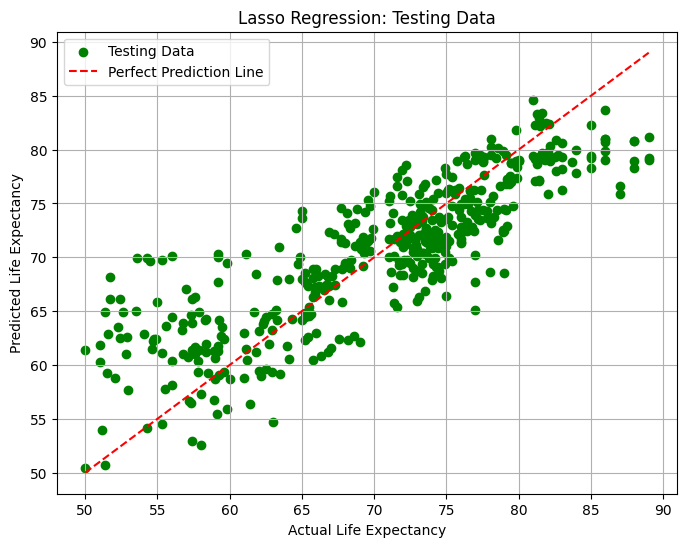

In [48]:
# testing lasso regression model
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(LifeExpectancy_test, y_pred_lasso)
print("Mean squared error (Lasso):", mse_lasso)
plt.figure(figsize=(8, 6))
plt.scatter(LifeExpectancy_test, y_pred_lasso, color='green', label='Testing Data')
plt.plot([min(LifeExpectancy_test), max(LifeExpectancy_test)], [min(LifeExpectancy_test), max(LifeExpectancy_test)], color='red', linestyle='--',label='Perfect Prediction Line')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Lasso Regression: Testing Data')
plt.legend()
plt.grid(True)
plt.show()

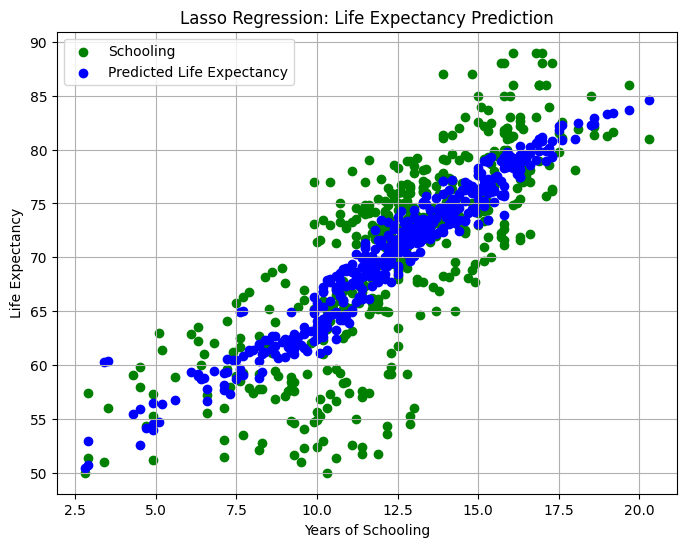

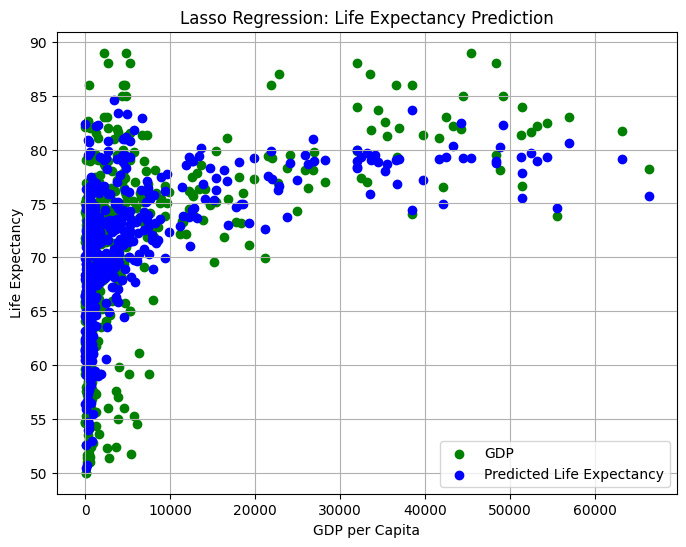

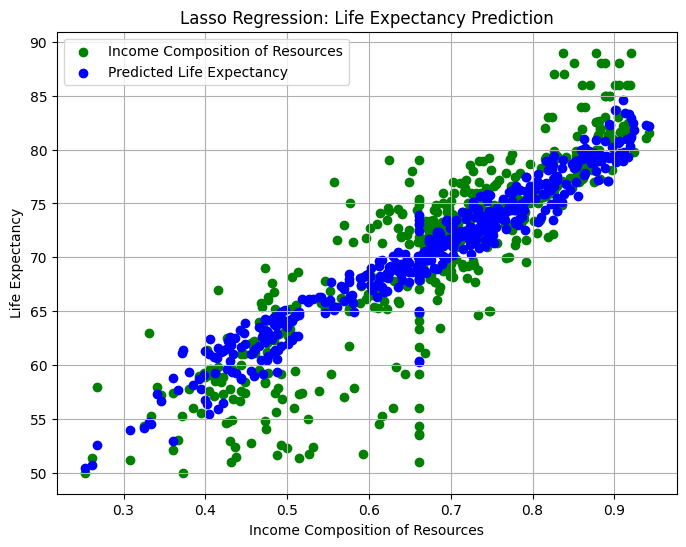

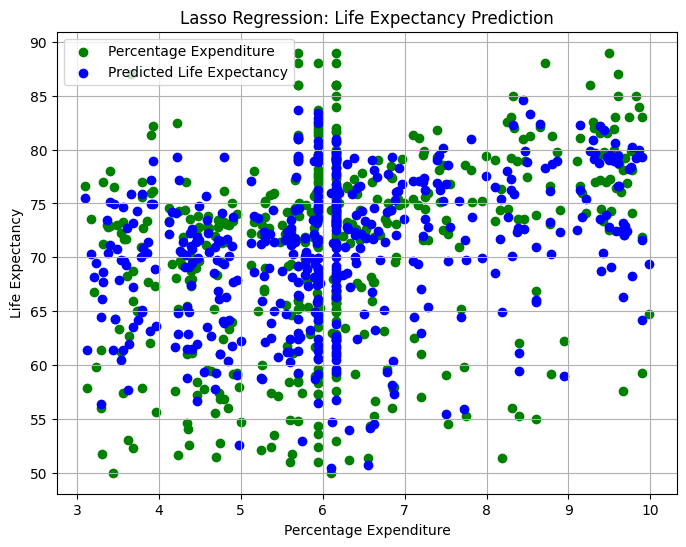

In [51]:
import matplotlib.pyplot as plt

# Plotting indivodual features against life expectancy
plt.figure(figsize=(8, 6))
plt.scatter(Schooling_test, LifeExpectancy_test, color='green', label='Schooling')
plt.scatter(Schooling_test, y_pred_lasso, color='blue', label='Predicted Life Expectancy')
plt.xlabel('Years of Schooling')
plt.ylabel('Life Expectancy')
plt.title('Lasso Regression: Life Expectancy Prediction')
plt.legend()
plt.grid(True)
plt.show()

# gdp
plt.figure(figsize=(8, 6))
plt.scatter(GDP_test, LifeExpectancy_test, color='green', label='GDP')
plt.scatter(GDP_test, y_pred_lasso, color='blue', label='Predicted Life Expectancy')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('Lasso Regression: Life Expectancy Prediction')
plt.legend()
plt.grid(True)
plt.show()

# income composition of resources
plt.figure(figsize=(8, 6))
plt.scatter(IncomeCompositionOfResources_test, LifeExpectancy_test, color='green', label='Income Composition of Resources')
plt.scatter(IncomeCompositionOfResources_test, y_pred_lasso, color='blue', label='Predicted Life Expectancy')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy')
plt.title('Lasso Regression: Life Expectancy Prediction')
plt.legend()
plt.grid(True)
plt.show()


# percentage expenditure
plt.figure(figsize=(8, 6))
plt.scatter(PercentageExpenditure_test, LifeExpectancy_test, color='green', label='Percentage Expenditure')
plt.scatter(PercentageExpenditure_test, y_pred_lasso, color='blue', label='Predicted Life Expectancy')
plt.xlabel('Percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.title('Lasso Regression: Life Expectancy Prediction')
plt.legend()
plt.grid(True)
plt.show()



# Elastic Net


In [ ]:
#Does money make people live longer
from sklearn.linear_model import ElasticNet
import numpy as np

# train elastic net regression model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Using Elastic Net with alpha=0.1 and l1_ratio=0.5
X_train = np.column_stack((GDP_train, PercentageExpenditure_train))
elastic_net_model.fit(X_train, LifeExpectancy_train)


In [ ]:
print("Coefficients:", elastic_net_model.coef_)
print("Intercept:", elastic_net_model.intercept_)

In [ ]:
# testing elastic net regression model
from sklearn.metrics import mean_squared_error

X_test = np.column_stack((GDP_test, PercentageExpenditure_test))
y_pred_elastic_net = elastic_net_model.predict(X_test)
mse_elastic_net = mean_squared_error(LifeExpectancy_test, y_pred_elastic_net)
print("Mean squared error:", mse_elastic_net)


In [ ]:
# testing elastic net regression model using r2 score
from sklearn.metrics import r2_score

r2 = r2_score(LifeExpectancy_test, y_pred_elastic_net)
print("R2 Score:", r2)

In [ ]:
#optimising elastic net model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
import numpy as np

# create Elastic Net model
elastic_net_model = ElasticNet()

# create a dictionary of hyperparameters to search
search_parameters = {
    'alpha': [0.1, 0.5, 1, 5, 10],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
}

# create grid search object
grid_search = GridSearchCV(elastic_net_model, search_parameters, cv=5, scoring='neg_mean_squared_error')

# fit model
X = np.column_stack((GDP_train, PercentageExpenditure_train))
grid_search.fit(X, LifeExpectancy_train)

# get best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


In [ ]:
#testing elastic net model with best hyperparameters
from sklearn.metrics import mean_squared_error

X_test = np.column_stack((GDP_test, PercentageExpenditure_test))
y_pred_elastic_net = grid_search.predict(X_test)
mse_elastic_net = mean_squared_error(LifeExpectancy_test, y_pred_elastic_net)
print("Mean squared error:", mse_elastic_net)

# testing elastic net regression model using r2 score and best hyperparameters
from sklearn.metrics import r2_score

r2 = r2_score(LifeExpectancy_test, y_pred_elastic_net)
print("R2 Score:", r2)

In [ ]:
#displaying elastic net regression model
import matplotlib.pyplot as plt

plt.scatter(GDP_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(GDP_test, y_pred_elastic_net, color='red', label='Predicted data')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Elastic Net Regression Model')
plt.legend()
plt.show()

plt.scatter(PercentageExpenditure_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(PercentageExpenditure_test, y_pred_elastic_net, color='red', label='Predicted data')
plt.xlabel('Percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.title('Elastic Net Regression Model')
plt.legend()
plt.show()

In [ ]:
#making predictions with elastic net regression model
new_GDP = 65000
new_PercentageExpenditure = 5
X_new = np.array([[new_GDP, new_PercentageExpenditure]])
predicted_life_expectancy_elastic_net = elastic_net_model.predict(X_new)
print("Predicted Life Expectancy:", predicted_life_expectancy_elastic_net)

In [ ]:
# Does social class affect life expectancy
from sklearn.linear_model import ElasticNet
import numpy as np

# train elastic net regression model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Using Elastic Net with alpha=0.1 and l1_ratio=0.5
X_train = np.column_stack((GDP_train, Schooling_train, IncomeCompositionOfResources_train, PercentageExpenditure_train))
elastic_net_model.fit(X_train, LifeExpectancy_train)

In [ ]:
print("Coefficients:", elastic_net_model.coef_)
print("Intercept:", elastic_net_model.intercept_)

In [ ]:
# testing elastic net regression model
from sklearn.metrics import mean_squared_error

X_test = np.column_stack((GDP_test, Schooling_test, IncomeCompositionOfResources_test, PercentageExpenditure_test))
y_pred_elastic_net = elastic_net_model.predict(X_test)
mse_elastic_net = mean_squared_error(LifeExpectancy_test, y_pred_elastic_net)
print("Mean squared error:", mse_elastic_net)

In [ ]:
# testing elastic net regression model using r2 score
from sklearn.metrics import r2_score

r2 = r2_score(LifeExpectancy_test, y_pred_elastic_net)
print("R2 Score:", r2)

In [ ]:
#Optimising the model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
import numpy as np

# create Elastic Net model
elastic_net_model = ElasticNet()

# create a dictionary of hyperparameters to search
search_parameters = {
    'alpha': [0.1, 0.5, 1, 5, 10],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
}

# create grid search object
grid_search = GridSearchCV(elastic_net_model, search_parameters, cv=5, scoring='neg_mean_squared_error')

# fit model
X = np.column_stack((GDP_train, PercentageExpenditure_train))
grid_search.fit(X, LifeExpectancy_train)

# get best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


In [ ]:
#testing elastic net model with best hyperparameters
from sklearn.metrics import mean_squared_error

X_test = np.column_stack((GDP_test, PercentageExpenditure_test))
y_pred_elastic_net = grid_search.predict(X_test)
mse_elastic_net = mean_squared_error(LifeExpectancy_test, y_pred_elastic_net)
print("Mean squared error:", mse_elastic_net)

# testing elastic net regression model using r2 score and best hyperparameters
from sklearn.metrics import r2_score

r2 = r2_score(LifeExpectancy_test, y_pred_elastic_net)
print("R2 Score:", r2)

In [ ]:
#displaying elastic net regression model
import matplotlib.pyplot as plt

plt.scatter(GDP_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(GDP_test, y_pred_elastic_net, color='red', label='Predicted data')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Elastic Net Regression Model')
plt.legend()
plt.show()

plt.scatter(Schooling_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(Schooling_test, y_pred_elastic_net, color='red', label='Predicted data')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Elastic Net Regression Model')
plt.legend()
plt.show()

plt.scatter(IncomeCompositionOfResources_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(IncomeCompositionOfResources_test, y_pred_elastic_net, color='red', label='Predicted data')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy')
plt.title('Elastic Net Regression Model')
plt.legend()
plt.show()

plt.scatter(PercentageExpenditure_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(PercentageExpenditure_test, y_pred_elastic_net, color='red', label='Predicted data')
plt.xlabel('Percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.title('Elastic Net Regression Model')
plt.legend()
plt.show()


In [ ]:
#making predictions with elastic net regression model
new_GDP = 100000
new_Schooling = 10
new_IncomeCompositionOfResources = 0.8
new_PercentageExpenditure = 5
X_new = np.array([[new_GDP, new_Schooling, new_IncomeCompositionOfResources, new_PercentageExpenditure]])
predicted_life_expectancy_elastic_net = elastic_net_model.predict(X_new)
print("Predicted Life Expectancy:", predicted_life_expectancy_elastic_net)

# Random Forest

## Social Group

In [ ]:
# Does social class affect life expectancy: Random Forest

# reshape data
from sklearn.ensemble import RandomForestRegressor
import numpy as np
GDP_train= GDP_train.to_numpy().reshape(-1, 1)
Schooling_train = Schooling_train.to_numpy().reshape(-1, 1)
IncomeCompositionOfResources_train = IncomeCompositionOfResources_train.to_numpy().reshape(-1, 1)
PercentageExpenditure_train = PercentageExpenditure_train.to_numpy().reshape(-1, 1)

GDP_test = GDP_test.to_numpy().reshape(-1, 1)
Schooling_test = Schooling_test.to_numpy().reshape(-1, 1)
IncomeCompositionOfResources_test = IncomeCompositionOfResources_test.to_numpy().reshape(-1, 1)
PercentageExpenditure_test = PercentageExpenditure_test.to_numpy().reshape(-1, 1)



In [ ]:
# train model
X_train = np.concatenate((GDP_train, Schooling_train, IncomeCompositionOfResources_train, PercentageExpenditure_train), axis = 1)
m = len(X_train)
X_train_with_bias = np.concatenate((np.ones((m,1)), X_train), axis=1)
y_train = LifeExpectancy_train
regressor = RandomForestRegressor(n_estimators=10, random_state=42, oob_score=True)
regressor.fit(X_train_with_bias, y_train)


In [ ]:
# test model
from sklearn.metrics import mean_squared_error, r2_score

X_test = np.concatenate((GDP_test, Schooling_test, IncomeCompositionOfResources_test, PercentageExpenditure_test), axis = 1)
m = len(X_test)
X_test_with_bias = np.concatenate((np.ones((m,1)), X_test), axis=1)
y_test = LifeExpectancy_test
y_prediction = regressor.predict(X_test_with_bias)


mse = mean_squared_error(y_test, y_prediction)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_prediction)
print(f'R-squared: {r2}')

In [ ]:
# Displaying
# GDP
plt.scatter(GDP_test, y_test, color = 'blue', label = 'Original data')
plt.scatter(GDP_test, y_prediction, color = 'limegreen', label = 'Predicted data')
plt.xlabel("GDP")
plt.ylabel("Mean life expectancy")
plt.title("Random Forest Model Prediction for Life Expectancy and GDP")
plt.legend()
plt.show()

plt.scatter(Schooling_test, y_test, color = 'blue', label = 'Original data')
plt.scatter(Schooling_test, y_prediction, color = 'limegreen', label = 'Predicted data')
plt.xlabel("Average number of years spent in education")
plt.ylabel("Mean life expectancy")
plt.title("Random Forest Model Prediction for Life Expectancy and Schooling")
plt.legend()
plt.show()

plt.scatter(IncomeCompositionOfResources_test, y_test, color = 'blue', label = 'Original data')
plt.scatter(IncomeCompositionOfResources_test, y_prediction, color = 'limegreen', label = 'Predicted data')
plt.xlabel("Income composition of resources index score")
plt.ylabel("Mean life expectancy")
plt.title("Random Forest Model Prediction for Life Expectancy and Income Composition of Resources")
plt.legend()
plt.show()

plt.scatter(PercentageExpenditure_test, y_test, color = 'blue', label = 'Original data')
plt.scatter(PercentageExpenditure_test, y_prediction, color = 'limegreen', label = 'Predicted data')
plt.xlabel("Percentage expenditure (%)")
plt.ylabel("Mean life expectancy")
plt.title("Random Forest Model Prediction for Life Expectancy and Percentage of Government Expenditure on Healthcare")
plt.legend()
plt.show()

In [ ]:
# optimise
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100],
    'max_features': [4],
    'max_depth': [30],
    'max_leaf_nodes': [100],
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    RandomForestRegressor(),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train_with_bias, y_train)

best_params = grid_search.best_params_

model_grid = RandomForestRegressor(**best_params, random_state=42)  # Use best_params here
model_grid.fit(X_train_with_bias, y_train)
y_prediction = model_grid.predict(X_test_with_bias)

mse_op = mean_squared_error(y_test, y_prediction)
print(f'Mean Squared Error: {mse_op}')

r2_op = r2_score(y_test, y_prediction)
print(f'R-squared: {r2_op}')

In [ ]:
mse_improvement = mse - mse_op
rs_improvement = r2 - r2_op
print(f'Mean squared error decreased by: {abs(mse_improvement)}')
print(f'R-squared accuracy value increased by: {abs(rs_improvement)}')

In [ ]:
mse_values = {'Pre-optimisation' : mse,
              'Post-optimisation' : mse_op}
mse_values =  pd.Series(mse_values)
fig, ax = plt.subplots()
mse_values.plot(kind='bar', color = ['blue', 'limegreen'], ax=ax)
ax.set_axisbelow(True)
ax.grid(axis='y')
plt.ylabel('Mean Squared Error')
plt.xlabel('Optimisation status')
plt.title('Change in Mean Squared Error')
plt.xticks(rotation = 45)
plt.legend()
plt.show()


rs_values = {'Pre-optimisation' : r2,
              'Post-optimisation' : r2_op}
rs_values =  pd.Series(rs_values)
fig, ax = plt.subplots()
rs_values.plot(kind='bar', color = ['blue', 'limegreen'], ax=ax)
ax.set_axisbelow(True)
ax.grid(axis='y')
plt.ylabel('R-squared accuracy value')
plt.xlabel('Optimisation status')
plt.title('Change in R-squared  Accuracy Value')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

## Continents

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
X_train = np.concatenate((Continents_train, Development_status_train), axis=1)
y_train = LifeExpectancy_train
regressor = RandomForestRegressor(n_estimators=10, random_state=42, oob_score=True)
regressor.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

X_test =np.concatenate((Continents_test, Development_status_test), axis=1)
y_test = LifeExpectancy_test
y_prediction = regressor.predict(X_test)


mse = mean_squared_error(y_test, y_prediction)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_prediction)
print(f'R-squared: {r2}')

In [ ]:
lifeexpec_test_graphable = pd.DataFrame(y_test)
lifeexpec_pred_graphable= pd.DataFrame(y_prediction)
lifeexpec_pred_graphable.rename(columns = {0:'Lifeexpectancy'}, inplace = True)

Continents_test_graphable =  pd.DataFrame(Continents_test)
test_graph = pd.concat([Continents_test_graphable, lifeexpec_test_graphable], axis = 1)
Continents_test_graphable.reset_index(drop=True, inplace=True)
predict_graph =  pd.concat([Continents_test_graphable, lifeexpec_pred_graphable], axis = 1)

dev_test_graphable = pd.DataFrame(Development_status_test)
dev_le_test_graph = pd.concat([dev_test_graphable, lifeexpec_test_graphable], axis = 1)
Continents_test_graphable.reset_index(drop=True, inplace=True)
dev_le_pred_graph = pd.concat([dev_test_graphable, lifeexpec_pred_graphable], axis = 1)


In [ ]:
continent_means_test = {}
continent_means_pred = {}

for continent in ['Europe', 'Asia', 'North America', 'Oceania', 'South America', 'Africa']:

    continent_df_test = test_graph[test_graph[continent] == 1]
    continent_df_pred = predict_graph[predict_graph[continent] == 1]

    mean_life_expectancy_test = continent_df_test['Lifeexpectancy'].mean()
    mean_life_expectancy_pred = continent_df_pred['Lifeexpectancy'].mean()

    continent_means_test[continent] = mean_life_expectancy_test
    continent_means_pred[continent] = mean_life_expectancy_pred

continent_means_series_test = pd.Series(continent_means_test)
continent_means_series_pred = pd.Series(continent_means_pred)

bar_width = 0.35
range1 = range(len(continent_means_series_test))
range2 = [x + bar_width for x in range1]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range1, continent_means_series_test, color='limegreen', width=bar_width, edgecolor='grey', label='Test Data')
plt.bar(range2, continent_means_series_pred, color='blue', width=bar_width, edgecolor='grey', label='Prediction Data')
plt.xlabel('Continent', fontweight='bold')
plt.ylabel('Mean Life Expectancy', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(continent_means_series_test))], continent_means_series_test.index, rotation=45)
plt.title('Mean Life Expectancy by Continent', fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
dev_means_test = {}
dev_means_pred = {}

for status in ['Developed', 'Developing']:

    dev_df_test = dev_le_test_graph[dev_le_test_graph[status] == 1]
    dev_df_pred = dev_le_pred_graph[dev_le_pred_graph[status] == 1]

    mean_life_expectancy_test = dev_df_test['Lifeexpectancy'].mean()
    mean_life_expectancy_pred = dev_df_pred['Lifeexpectancy'].mean()

    dev_means_test[status] = mean_life_expectancy_test
    dev_means_pred[status] = mean_life_expectancy_pred

dev_means_test_series = pd.Series(dev_means_test)
dev_means_pred_series = pd.Series(dev_means_pred)

bar_width = 0.35
range1 = range(len(dev_means_test_series))
range2 = [x + bar_width for x in range1]

# Plot
plt.figure(figsize=(10, 6))

plt.bar(range1, dev_means_test_series, color='limegreen', width=bar_width, edgecolor='grey', label='Test Data')
plt.bar(range2, dev_means_pred_series, color='blue', width=bar_width, edgecolor='grey', label='Prediction Data')
plt.xlabel('Development status', fontweight='bold')
plt.ylabel('Mean Life Expectancy', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(dev_means_test_series))], dev_means_test_series.index, rotation=45)
plt.title('Mean Life Expectancy by Development Status', fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# optimise
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100],
    'max_features': [9],
    'max_depth': [64],
    'max_leaf_nodes': [100],
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    RandomForestRegressor(),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

model_grid = RandomForestRegressor(**best_params, random_state=42)  # Use best_params here
model_grid.fit(X_train, y_train)
y_prediction = model_grid.predict(X_test)

mse_op = mean_squared_error(y_test, y_prediction)
print(f'Mean Squared Error: {mse_op}')

r2_op = r2_score(y_test, y_prediction)
print(f'R-squared: {r2_op}')

In [ ]:
mse_values = {'Pre-optimisation' : mse,
              'Post-optimisation' : mse_op}
mse_values =  pd.Series(mse_values)
fig, ax = plt.subplots()
mse_values.plot(kind='bar', color = ['blue', 'limegreen'], ax=ax)
for i, v in enumerate(mse_values):
    ax.text(i, v + 0.01, str(round(v, 4)), ha='center')
ax.set_axisbelow(True)
ax.grid(axis='y')
plt.ylabel('Mean Squared Error')
plt.xlabel('Optimisation status')
plt.title('Change in Mean Squared Error')
plt.xticks(rotation = 45)
plt.legend()
plt.show()


rs_values = {'Pre-optimisation' : r2,
              'Post-optimisation' : r2_op}
rs_values =  pd.Series(rs_values)
r2, r2_op
fig, ax = plt.subplots()
rs_values.plot(kind='bar', color = ['blue', 'limegreen'], ax=ax)
for i, v in enumerate(rs_values):
    ax.text(i, v + 0.01, str(round(v, 4)), ha='center')
ax.set_axisbelow(True)
ax.grid(axis='y')
plt.ylabel('R-squared accuracy value')
plt.xlabel('Optimisation status')
plt.title('Change in R-squared  Accuracy Value')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [ ]:
mse_improvement = mse - mse_op
rs_improvement = r2 - r2_op
print(f'Mean squared error decreased by: {abs(mse_improvement)}')
print(f'R-squared accuracy value increased by: {abs(rs_improvement)}')